# Project Summary

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
    - Kaggle Website
    
Data set is provided through Kaggle [here](https://www.kaggle.com/c/titanic/data).

### Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../titanic"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.2
SciPy version: 1.2.1
IPython version: 7.4.0
scikit-learn version: 0.20.3
-------------------------
gender_submission.csv
kaggle_titanic.ipynb
test.csv
train.csv



We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library.

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = (12,8)

### Getting to know the data.

1. The `Survived` variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
2. The `PassengerID` and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The `Pclass` variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The `Name` variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The `Sex` and `Embarked` variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
6. The `Age` and `Fare` variable are continuous quantitative datatypes.
7. The `SibSp` represents number of related siblings/spouse aboard and `Parch` represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
8. The `Cabin` variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

The type of machine learning we will be doing is called __classification__, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing __binary classification__, which means that there are only two different states we are classifying.

# Preparing Data

In [3]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.drop('Cabin', axis=1, inplace=True)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [6]:
test.drop('Cabin', axis=1, inplace=True)
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### We'll start by exploring `Sex` and `Pclass` by visualizing the data.

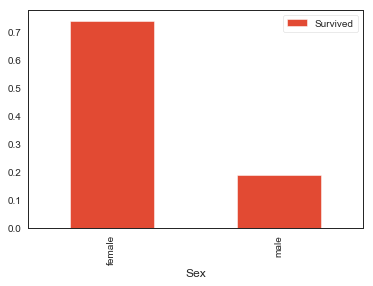

In [7]:
sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()
plt.show()

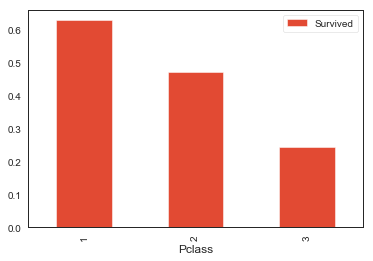

In [8]:
pclass_pivot = train.pivot_table(index='Pclass', values='Survived')
pclass_pivot.plot.bar()
plt.show()

Based on the plots above, we can see that females were more likely to survive than males and that those in the upper class categorization were more likely to survive than any other class.

### Checking survival status by `Age`

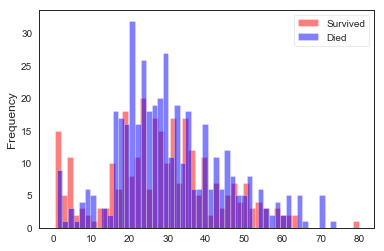

In [9]:
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

Since age is a continuous variable, we have to treat it differently than the categorical variable `Sex` and `Pclass`.  We can convert the `Age` column to specify whether the person specified is:

1. Missing (empty value)
2. Infant
3. Child
4. Teenager
5. Young Adult
6. Adult
7. Senior



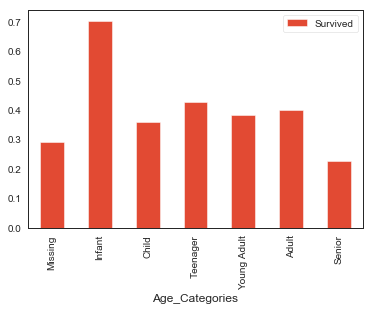

In [10]:
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_Categories'] = pd.cut(df['Age'], cut_points, labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

age_pivot = train.pivot_table(index='Age_Categories', values='Survived')
age_pivot.plot.bar()
plt.show()

So far we have identified three columns that may be useful for predicting survival:

- `Sex`
- `Pclass`
- `Age`, or more specifically our newly created `Age_categories`

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the `Pclass` column, we know they are 1, 2, and 3.

In [11]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df,dummies], axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")
train = create_dummies(train,"Age_Categories")
test = create_dummies(test,"Age_Categories")

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_Categories_Missing,Age_Categories_Infant,Age_Categories_Child,Age_Categories_Teenager,Age_Categories_Young Adult,Age_Categories_Adult,Age_Categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


# Training First Model: Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

holdout = test

features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
           'Age_Categories_Missing','Age_Categories_Infant',
           'Age_Categories_Child', 'Age_Categories_Teenager',
           'Age_Categories_Young Adult', 'Age_Categories_Adult',
           'Age_Categories_Senior']

all_X = train[features]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=1)

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.7932960893854749


Our model has an accuracy score of 79.33% when tested against our 20% test set. Given that this data set is quite small, there is a good chance that our model is overfitting, and will not perform as well on totally unseen data.

In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()

scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)

print(accuracy, '\n', scores)

0.8024670865963002 
 [0.8        0.81111111 0.7752809  0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80681818]


From the results of our k-fold validation, you can see that the accuracy number varies with each fold - ranging between 76.40% and 87.64%.

# Feature Preparation, Selection and Engineering

There are two main areas we can focus on to boost the accuracy of our predictions:

- Improving the features we train our model on
- Improving the model itself

Here is a list of the remaining columns (with a brief description):

- SibSp - The number of siblings or spouses the passenger had aboard the Titanic
- Parch - The number of parents or children the passenger had aboard the Titanic
- Ticket - The passenger's ticket number
- Fare - The fair the passenger paid
- Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [15]:
columns = ['SibSp','Parch','Fare','Embarked']
train[columns].describe(include='all',percentiles=[])

,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,644
mean,0.523008,0.381594,32.204208,NaN
std,1.102743,0.806057,49.693429,NaN
min,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,14.454200,NaN
max,8.000000,6.000000,512.329200,NaN


Of these, SibSp, Parch and Fare look to be standard numeric columns with no missing values. Embarked looks to be a standard categorical column with 3 unique values, much like PClass was, except that there are two missing values. We can easily fill these two missing values with the most common value, "S" which occurs 644 times.

Looking at our numeric columns, we can see a big difference between the range of each. SibSp has values between 0-8, Parch between 0-6, and Fare is on a dramatically different scale, with values ranging from 0-512. In order to make sure these values are equally weighted within our model, we'll need to rescale the data.

In [16]:
from sklearn.preprocessing import minmax_scale
# The holdout set has a missing value in the Fare column which
# we'll fill with the mean.
holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())
columns = ["SibSp","Parch","Fare"]

train['Embarked'] = train['Embarked'].fillna('S')
holdout['Embarked'] = holdout['Embarked'].fillna('S')

train = create_dummies(train,"Embarked")
holdout = create_dummies(holdout,"Embarked")

for col in columns:
    train[col + '_scaled'] = minmax_scale(train[col])
    holdout[col + '_scaled'] = minmax_scale(holdout[col])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


### Determining most relevant features for model

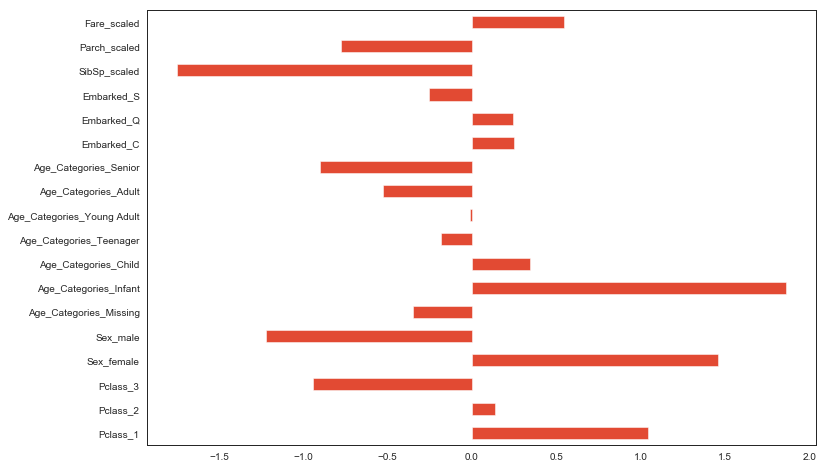

In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
           'Age_Categories_Missing','Age_Categories_Infant',
           'Age_Categories_Child', 'Age_Categories_Teenager',
           'Age_Categories_Young Adult', 'Age_Categories_Adult',
           'Age_Categories_Senior', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
           'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

lr = LogisticRegression()
lr.fit(train[features], train['Survived'])
# Logit coefficient
coefficients = lr.coef_
feature_relevance = pd.Series(coefficients[0], index=train[features].columns)

feature_relevance.plot.barh(figsize=(12,8))
plt.show()

To make things easier to interpret, we'll alter the plot to show all positive values, and have sorted the bars in order of size:

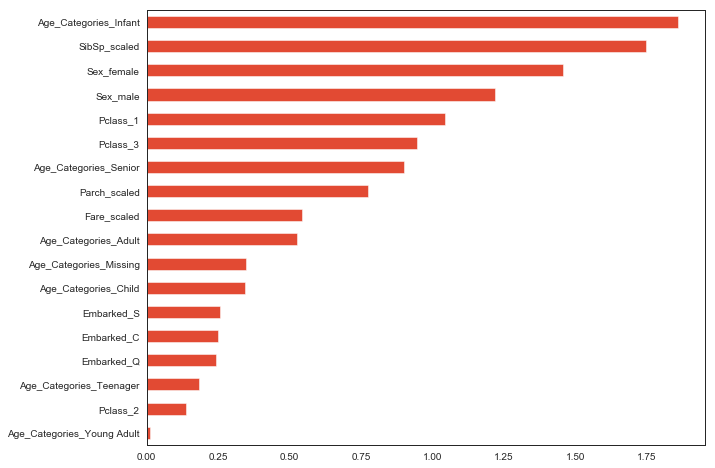

In [18]:
ordered_feature = feature_relevance.abs().sort_values()
ordered_feature.plot.barh(figsize=(10,8))
plt.show()

We will use the top 6 features in order to predict whether a passenger survived or not.

In [19]:
features_6 = ['Age_Categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_3']

all_X = train[features_6]
all_y = train['Survived']

lr = LogisticRegression()

from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)

print(accuracy)

0.8102823175575985


We have marginally improved our accuracy from 80.2% to 81.02% so far.

# Feature Engineering

Starting off with the `Fare` column

In [20]:
def process_fare(df, cut_points, label_names):
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df['Fare_Categories'] = pd.cut(df['Fare'], cut_points, labels=label_names)
    return df

cut_points = [0, 12, 50, 100, 1000]
label_names = ['0-12', '12-50', '50-100', '100+']

train = process_fare(train, cut_points, label_names)
holdout = process_fare(holdout, cut_points, label_names)

train = create_dummies(train, 'Fare_Categories')
holdout = create_dummies(holdout, 'Fare_Categories')

Extracting text from the `Name` column to see survival rates based on their titles:

1. Mr
2. Mrs
3. Master
4. Miss
5. Officer
6. Royalty

In [21]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'] = extracted_titles.map(titles)

In [22]:
extracted_titles = holdout["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
holdout["Title"] = extracted_titles.map(titles)

In [23]:
train = create_dummies(train, 'Title')
holdout = create_dummies(holdout, 'Title')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_Categories_12-50,Fare_Categories_50-100,Fare_Categories_100+,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,Mr,0,0,1,0,0,0


### Finding Collinearity

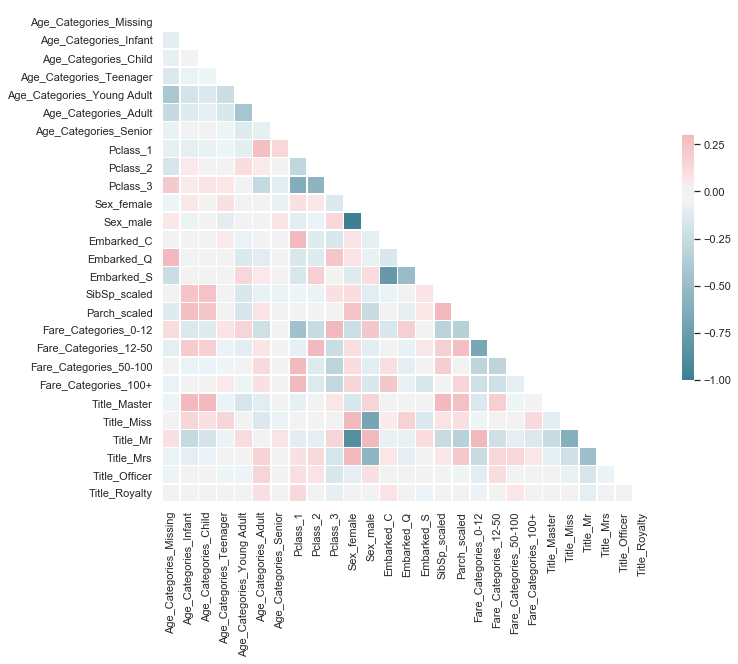

In [25]:
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Age_Categories_Missing', 'Age_Categories_Infant',
       'Age_Categories_Child', 'Age_Categories_Teenager',
       'Age_Categories_Young Adult', 'Age_Categories_Adult',
       'Age_Categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_Categories_0-12',
       'Fare_Categories_12-50','Fare_Categories_50-100', 'Fare_Categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', ]
plot_correlation_heatmap(train[columns])

We can see that there is a high correlation between Sex_female/Sex_male and Title_Miss/Title_Mr/Title_Mrs. We will remove the columns Sex_female and Sex_male since the title data may be more nuanced.

Apart from that, we will remove one of each of our dummy variables to reduce the collinearity in each:

- Pclass_2
- Age_categories_Teenager
- Fare_categories_12-50
- Title_Master

The RFECV class starts by training a model using all of your features and scores it using cross validation. It then uses the logit coefficients to eliminate the least important feature, and trains and scores a new model. At the end, the class looks at all the scores, and selects the set of features which scored highest.

In [26]:
from sklearn.feature_selection import RFECV

features = ['Age_Categories_Missing', 'Age_Categories_Infant',
       'Age_Categories_Child', 'Age_Categories_Young Adult',
       'Age_Categories_Adult', 'Age_Categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_Categories_0-12', 'Fare_Categories_50-100',
       'Fare_Categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty']

all_X = train[features]
all_y = train["Survived"]

lr = LogisticRegression()
selector = RFECV(lr, cv=10)

selector.fit(all_X, all_y)

optimized_columns = all_X.columns[selector.support_]
optimized_columns

Index(['Pclass_1', 'SibSp_scaled', 'Title_Mr', 'Title_Officer'], dtype='object')

In [27]:
features_RFECV = ['Pclass_1', 'SibSp_scaled', 'Title_Mr', 'Title_Officer']

all_X = train[features_RFECV]
all_y = train['Survived']

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)

accuracy = np.mean(scores)
accuracy

0.8215313244807627

We have modestly improved our prediction rates from 81.02% to 82.15%.

# Model Selection and Tuning

We will start using different machine learning algorithms to see if we can get a better prediction accuracy, but first we have to modify the datasets to use other algorithms.

In [28]:
columns = ['Survived', 'Age_Categories_Missing', 'Age_Categories_Infant',
       'Age_Categories_Child', 'Age_Categories_Young Adult',
       'Age_Categories_Adult', 'Age_Categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_Categories_0-12', 'Fare_Categories_50-100',
       'Fare_Categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty']
holdout_cols = ['Age_Categories_Missing', 'Age_Categories_Infant',
       'Age_Categories_Child', 'Age_Categories_Young Adult',
       'Age_Categories_Adult', 'Age_Categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_Categories_0-12', 'Fare_Categories_50-100',
       'Fare_Categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty']

train_modified = train[columns].copy()
holdout_modified = holdout[holdout_cols].copy()

In [29]:
train_modified.head()

,Survived,Age_Categories_Missing,Age_Categories_Infant,Age_Categories_Child,Age_Categories_Young Adult,Age_Categories_Adult,Age_Categories_Senior,Pclass_1,Pclass_3,Embarked_C,...,SibSp_scaled,Parch_scaled,Fare_Categories_0-12,Fare_Categories_50-100,Fare_Categories_100+,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,0,0,0,1,0,0,0,1,0,...,0.125,0.0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,1,0,1,...,0.125,0.0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,1,0,...,0.000,0.0,1,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0.125,0.0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0.000,0.0,1,0,0,0,1,0,0,0


In [30]:
holdout_modified.head()

,Age_Categories_Missing,Age_Categories_Infant,Age_Categories_Child,Age_Categories_Young Adult,Age_Categories_Adult,Age_Categories_Senior,Pclass_1,Pclass_3,Embarked_C,Embarked_Q,...,SibSp_scaled,Parch_scaled,Fare_Categories_0-12,Fare_Categories_50-100,Fare_Categories_100+,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,0,0,1,0,0,0,1,0,1,...,0.000,0.000000,1,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0.125,0.000000,1,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0.000,0.000000,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0.000,0.000000,1,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0.125,0.111111,0,0,0,0,0,1,0,0


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

all_X = train_modified.drop(['Survived'],axis=1)
all_y = train_modified['Survived']

lr = LogisticRegression()

accuracy_models = {}

scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy_lr = np.mean(scores)

accuracy_models['LogisticRegression'] = accuracy_lr

### Using K-Nearest Neighbors algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier
# Using a simple model
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, all_X, all_y, cv=10)
accuracy_knn = np.mean(scores)
accuracy_knn

0.7666998638066055

Different accuracy scores for different k-values

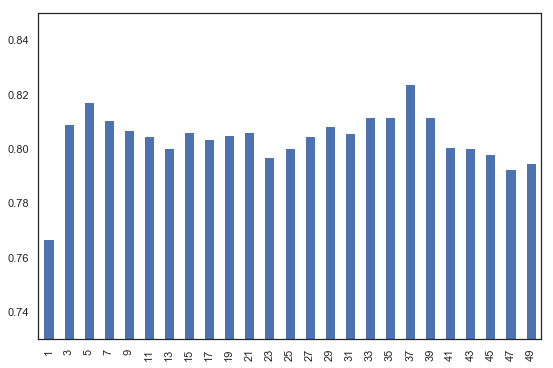

In [33]:
knn_scores = {}
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, all_X, all_y, cv=10)
    knn_scores[k] = np.mean(scores)
    
pd.Series(knn_scores).plot.bar(figsize=(9,6), ylim=(0.73, 0.85), rot=90)
plt.show()

In [35]:
print(max(knn_scores, key=knn_scores.get))
print(knn_scores[37])

accuracy_models['knn'] = {'k': 37, 'score': knn_scores[37]}

37
0.8238917262512768


K-value of 37 gave us the best accuracy with a prediction rate of 82.39%, a slight improvement from the optimized features logistic model.

### Hyperparameter Optimization with Grid Search

In [36]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_scores = grid.best_score_

accuracy_models['GridSearch'] = {'best_params': best_params, 'best_scores': best_scores}

In [37]:
print(best_params, 'with accuracy of: ', best_scores)

{'algorithm': 'brute', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'} with accuracy of:  0.8181818181818182


# Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_clf = scores.mean()
accuracy_clf

0.8104082964476221

In [44]:
# Using GridSearchCV to find best hyperparametersf or the Random Forest Model

hyperparameters = {'criterion': ['entropy', 'gini'],
                   'max_depth': [5, 10],
                   'max_features': ['log2', 'sqrt'],
                   'min_samples_leaf': [1, 5],
                   'min_samples_split': [3, 5],
                   'n_estimators': [6, 9]
                  }

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(best_params, ' with accuracy of: ', best_score)
accuracy_models['RandomForestModel'] = {'best_params': best_params, 'best_score': best_score}

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}  with accuracy of:  0.8305274971941639


The Random Forest Model has the best prediction rate so far with an accuracy of approximately 83.05%